# Twitter API

Twitter API v2

In [85]:
# Instalação das bibliotecas
!pip install pandas --quiet
!pip install tweepy --quiet
!pip install wordcloud --quiet


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
# Importando as bibliotecas
import tweepy

In [87]:
# Autenticação
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMvnigEAAAAAvrEAaE2q%2FIIAH6yJLoI%2FIbasEaY%3D6sEhz0ewca99ycXF0SO8ciS9zbKKq3qytU4bXnAmuFMkM3iWGo'
client = tweepy.Client(bearer_token)

In [88]:
# Recuperando Tweets
response = client.search_recent_tweets("#Eleições2022", max_results=100)

In [89]:
# Imprimindo Tweets
tweets = response.data

for tweet in tweets:
    print(tweet.text)

RT @choquei: 🚨URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e perseguir petista…
RT @JHFonseca: Campanha do PT em pânico, pois trackings de SP deterioram para ele. Além disso, declaração de Lula preconceituosa contra MEI…
RT @choquei: 🚨BRASIL: Entregadores de aplicativo fazem motociata na Avenida Paulista em um último apoio a Lula antes da votação. #Eleições2…
RT @choquei: 🚨URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e perseguir petista…
RT @orlandosilva: Neste domingo, vote 13! Não importa se você é mais de direita ou mais de esquerda, por amor a São Paulo, vote no @Haddad_…
RT @choquei: 🚨VEJA: Carla Zambelli deixando o lugar onde sacou arma para petista, ouvindo gritos de “vagabunda”, “racista”, “mentirosa”. #E…
RT @AmericaElige: Brazil (Presidential Election, second round), Datafolha poll:

Lula (PT, centre-left): 52% (-1)
Bolsonaro (PL, right): 48…
RT @choquei: 

In [90]:
# Agrupando os tweets em um dataframe
import pandas as pd

tweets_list = [[tweet.text] for tweet in tweets]
df = pd.DataFrame(tweets_list,columns=['Texto'])
pd.options.display.max_colwidth = 130 
df.head()

,Texto
0,RT @choquei: 🚨URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e pers...
1,"RT @JHFonseca: Campanha do PT em pânico, pois trackings de SP deterioram para ele. Além disso, declaração de Lula preconceituo..."
2,RT @choquei: 🚨BRASIL: Entregadores de aplicativo fazem motociata na Avenida Paulista em um último apoio a Lula antes da votaçã...
3,RT @choquei: 🚨URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e pers...
4,"RT @orlandosilva: Neste domingo, vote 13! Não importa se você é mais de direita ou mais de esquerda, por amor a São Paulo, vot..."


In [91]:
# Agrupando os tweets em uma string única
string = pd.Series(df['Texto'].values).str.cat(sep=' ')
string

'RT @choquei: 🚨URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e perseguir petista… RT @JHFonseca: Campanha do PT em pânico, pois trackings de SP deterioram para ele. Além disso, declaração de Lula preconceituosa contra MEI… RT @choquei: 🚨BRASIL: Entregadores de aplicativo fazem motociata na Avenida Paulista em um último apoio a Lula antes da votação. #Eleições2… RT @choquei: 🚨URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e perseguir petista… RT @orlandosilva: Neste domingo, vote 13! Não importa se você é mais de direita ou mais de esquerda, por amor a São Paulo, vote no @Haddad_… RT @choquei: 🚨VEJA: Carla Zambelli deixando o lugar onde sacou arma para petista, ouvindo gritos de “vagabunda”, “racista”, “mentirosa”. #E… RT @AmericaElige: Brazil (Presidential Election, second round), Datafolha poll:\n\nLula (PT, centre-left): 52% (-1)\nBolsonaro (PL, right): 48… RT @choqu

In [92]:
# Removendo caracteres especiais
caracteres = "@#🚨🗣️🔵"

for i in range(len(caracteres)):
    string = string.replace(caracteres[i],"")
string

'RT choquei: URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e perseguir petista… RT JHFonseca: Campanha do PT em pânico, pois trackings de SP deterioram para ele. Além disso, declaração de Lula preconceituosa contra MEI… RT choquei: BRASIL: Entregadores de aplicativo fazem motociata na Avenida Paulista em um último apoio a Lula antes da votação. Eleições2… RT choquei: URGENTE: Vídeo mostra disparos e comprova farsa de que Carla Zambelli foi empurrada antes de sacar a arma e perseguir petista… RT orlandosilva: Neste domingo, vote 13! Não importa se você é mais de direita ou mais de esquerda, por amor a São Paulo, vote no Haddad_… RT choquei: VEJA: Carla Zambelli deixando o lugar onde sacou arma para petista, ouvindo gritos de “vagabunda”, “racista”, “mentirosa”. E… RT AmericaElige: Brazil (Presidential Election, second round), Datafolha poll:\n\nLula (PT, centre-left): 52% (-1)\nBolsonaro (PL, right): 48… RT choquei: VEJA: Carla

In [93]:
# Ignorando classes de palavras
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["Eleicoes2022","Eleições2022","RT","por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes','vai','que','ou','anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc', 'foi', 'após', 'antes', 'agora', 'conscientemente', 'p'])

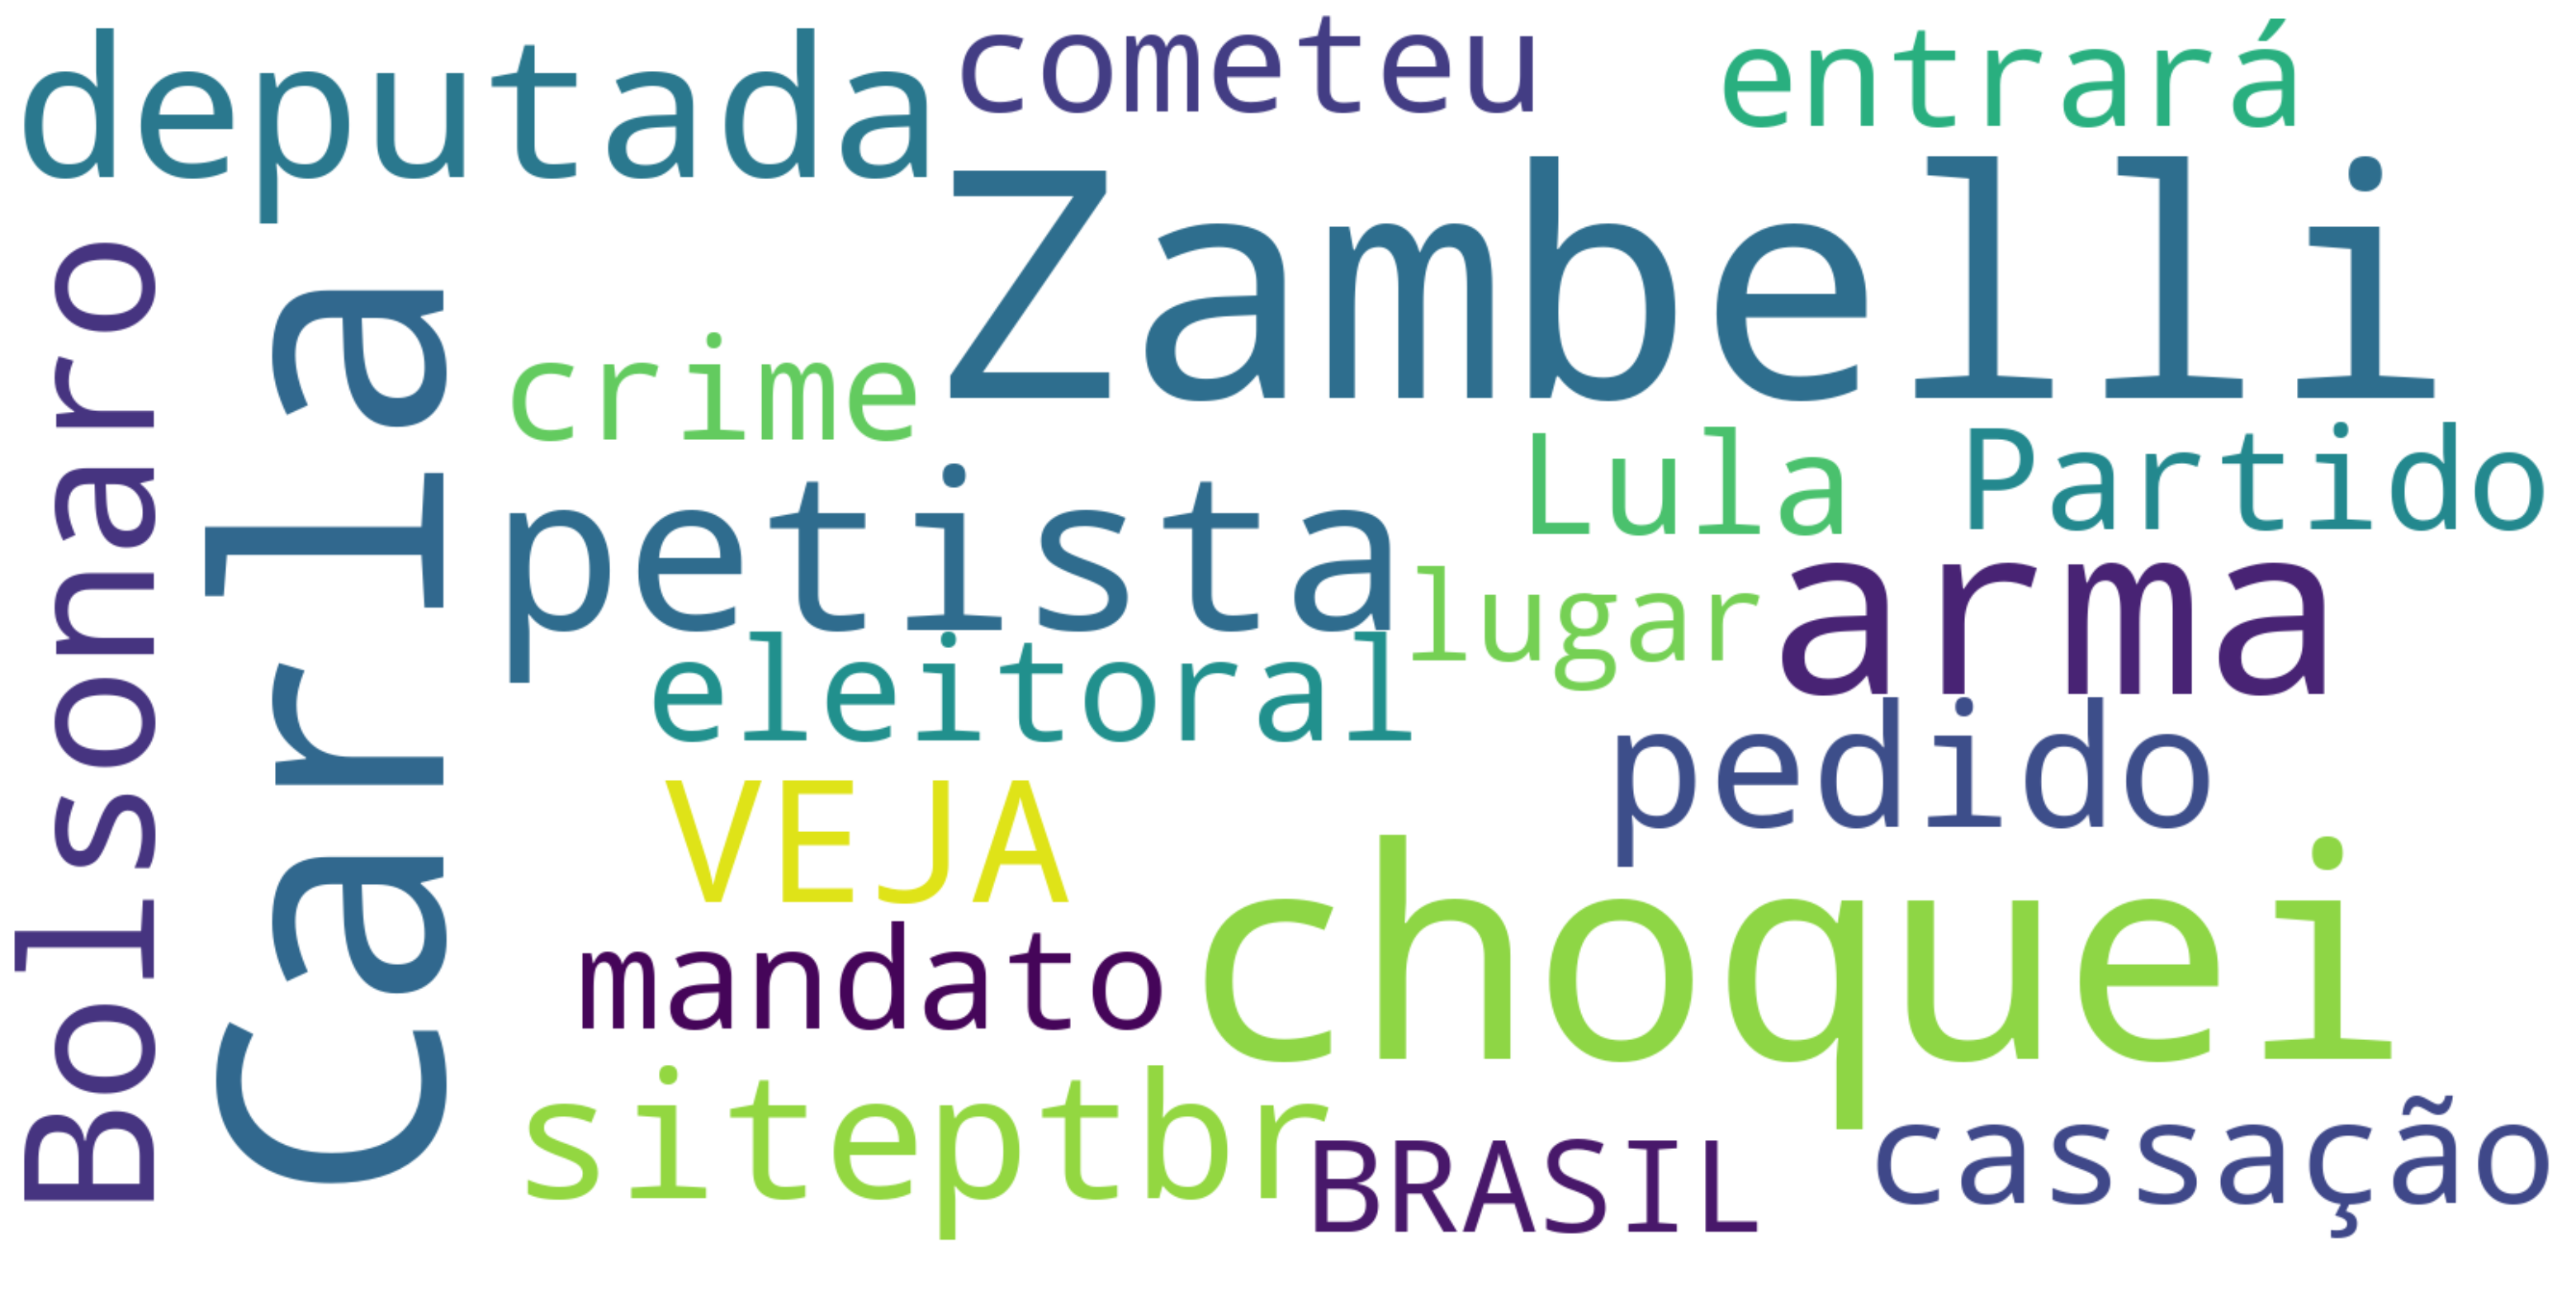

In [94]:
# Word Cloud com os textos dos tweets
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=20,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Autor

<a href="https://www.youtube.com/channel/UCa-d0hwYHOu6ehwc_oMjOoA" target="_blank">Alcides Lino (canal Programação e Liberdade)</a>

---

# Registro de Alterações (*Change Log*)

| Data (DD/MM/YYYY) | Versão  | Alterado Por | Descrição da Mudança                |
| ----------------- | ------- | ------------ | ----------------------------------- |
| 27/03/2022        | 1.0     | Alcides      | Versão inicial                      |